# 들어가기
이 포스트는 Winston Chang의 R Graphics Cookbook을 참고하였습니다.

광운대학교 경영학부 부교수 김태경

# 막대 그래프
R의 강력한 그래프 도구인 ggplot을 이용해서 그래프를 그려보자. 이번 시간에는 막대 그래프에 집중한다.

우선, 예제 데이터를 얻기 위해 gcookbook 패키지를 설치한다. 매번 설치할 필요가 없다. 한 번만 설치하고 필요하면 업데이트를 하자. 패키지를 설치하는 명령어는 **install.packages()**이다. 

In [1]:
install.packages("gcookbook")

Installing package into 'C:/rlibs'
(as 'lib' is unspecified)


package 'gcookbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\RtmpS2LiDE\downloaded_packages


패키지를 불러보자. 우리는 `ggplot2`와 `tidyverse`패키지를 불러온다. 패키지를 불러오려면 **library()**함수를 사용한다.

In [53]:
suppressWarnings(suppressMessages({
    library(ggplot2)
    library(tidyverse)
}))

In [12]:
options(repr.plot.width=3,repr.plot.height=2) #RStudio 사용자는 실행할 필요가 없다.

# geom_bar()

막대 그래프는 x에 대하여 개수(count)를 세어 그래프로 표시하며 아주 간단하다. 개수를 측정하는 일은 우리가 흔히 하는 일이기도 하다. 다음과 같이 개수를 세어주는 `table()`함수처럼.

In [88]:
table(mtcars$cyl)


 4  6  8 
11  7 14 

In [89]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


데이터 `mtcars`는 R에 기본적으로 탑재되어 있는 연습용 데이터다. 이런 데이터가 많고, 우리는 앞으로 연습 데이터와 gcookbook에 탑재된 데이터를 번갈아 쓸 것이다. 물론 여러분의 데이터도 `tibble`이나 `data.frame`객체로 된 경우에 자유롭게 가져와서 사용할 수 있다. 

함수 `str()`은 데이터의 구조를 보여준다. 자세한 설명은 다른 포스트를 참고하자.

In [14]:
g <- ggplot(mtcars,aes(x=cyl)) #팔레트에 그래프 올린다.
g <- g+geom_bar() #bar차트를 올린다.
g <- g+labs(title="Sample Bar",x='실린더 수',y="개수") #라벨링

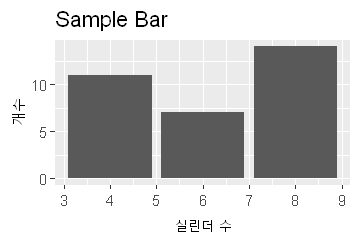

In [15]:
print(g)

위의 그래프는 문제가 있다. 왜냐하면 우리는 오직 4,6,8개 실린더 데이터만 있는데 그래프는 마치 3,5,7,9개 실린더도 데이터가 있는 것처럼 보인다. 이를 수정하기 위해 x에 입력되는 데이터를 factor 객체로 정의하자.

아래의 표현이 흔히 `geom_bar()`를 사용할 때 여러분이 할 수 있는 선택이다.

In [16]:
g <- ggplot(mtcars,aes(x=factor(cyl)))
g <- g+geom_bar()
g <- g+labs(title="Sample Bar",x='실린더 수',y="개수") #라벨링

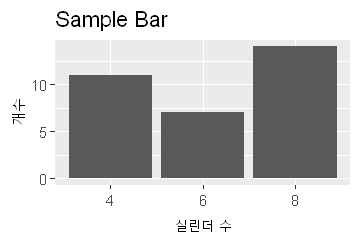

In [17]:
print(g)

# geom_hist()

히스토그램은 연속변수의 도수를 세어준다. `geom_bar()`가 factor 데이터에 적당하다면 `geom_hist()`는 보다 편리하게 도수분포를 알려준다. 사용법은 `geom_bar()`와 크게 다르지 않다. 기초적인 bin size는 30으로 되어 있다.

In [20]:
g <- ggplot(mtcars,aes(x=mpg))
g <- g+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


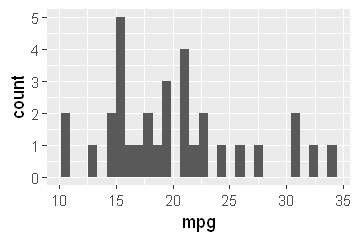

In [21]:
print(g)

그래프의 binwidth (막대의 크기)를 적절히 바꿔주면 더 좋은 모양을 얻는다.

In [30]:
g <- ggplot(mtcars,aes(x=mpg))
g <- g+geom_histogram(binwidth=3)

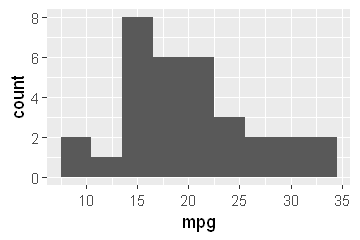

In [31]:
print(g)

# geom_boxplot()

변수의 분포를 알아보는 또 다른 도구는 `geom_boxplot()`이다. 최소값, 최대값, 중앙값(median), 중위수(25%,75%) 등을 시각적으로 확인할 수 있다. 

예제를 위해 ToothGrowth 데이터를 사용한다. 비타민 C 용량을 나타내는 dose와 이를 전달하는 두 가지 방법(orange juice, ascorbic acid)가 있고 그에 따른 치아의 크기(len)를 묶어 둔 데이터다.

In [32]:
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [33]:
g <- ggplot(ToothGrowth,aes(x=supp,y=len))
g <- g+geom_boxplot()

`geom_boxplot()`을 사용하려면 x와 y를 모두 정해줘야 한다. 이때, x는 factor 형 데이터, y는 연속변수다.

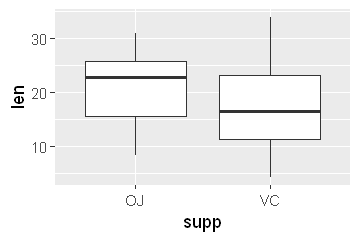

In [34]:
print(g)

전달 방법과 용량을 함께 고려하면 어떻게 될까? 두 변수의 결합 상태를 함께 보려면 `interaction()`으로 이를 묶어주면 된다.

In [35]:
g <- ggplot(ToothGrowth,aes(x=interaction(supp,dose),y=len))
g <- g+geom_boxplot()

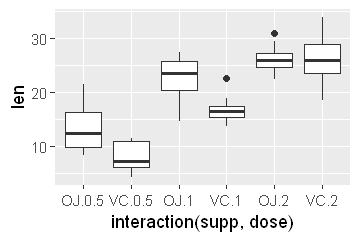

In [36]:
print(g)

결과를 보면 같은 용량의 비타민 C를 투입할 때 알약보다는 오렌지 쥬스를 선택하는 것이 치아 크기에 긍정적인 것처럼 보이지만, 투입 용량이 커지면 그 차이는 체계적으로 줄어든다.

# geom_col()

일반적인 형태의 막대 그래프는 `geom_col()`로 해결하면 된다. 데이터 분석 목적으로 가장 많이 쓰는 방법이기도 하다.

예를 위해 BOD 데이터를 가져온다. Time은 측정 시간, demand는 산소요구량이다.

In [37]:
str(BOD)

'data.frame':	6 obs. of  2 variables:
 $ Time  : num  1 2 3 4 5 7
 $ demand: num  8.3 10.3 19 16 15.6 19.8
 - attr(*, "reference")= chr "A1.4, p. 270"


`geom_col()`은 x와 y를 모두 aes()안에 지정한다. 그리고 이들은 x가 연속변수 혹은 factor이고 y는 연속변수이다.

In [38]:
g <- ggplot(BOD,aes(x=Time,y=demand))
g <- g+geom_col()

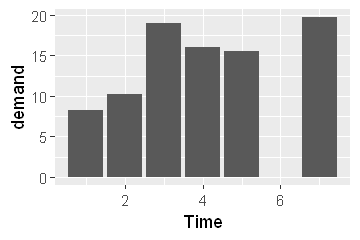

In [39]:
print(g)

`geom_bar()`와 마찬가지로 x가 factor일 때 보다 더 결과가 잘 보인다.

In [40]:
g <- ggplot(BOD,aes(x=factor(Time),y=demand))
g <- g+geom_col()

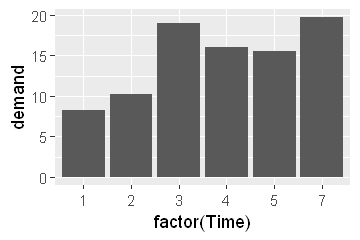

In [41]:
print(g)

순서를 정리해보자. 막대가 작은 것에서 커지는 방향으로 순서를 바꾸면 의미를 해석하기가 더 쉬울 수 있다. 이때 `reorder()` 함수를 사용한다. 입력값의 1번은 factor 데이터, 2번은 순서를 맞출 기준 데이터를 넣는다. 보통 y데이터를 넣어서 처리하면 된다.

In [44]:
g <- ggplot(BOD,aes(x=reorder(factor(Time),demand),y=demand))
g <- g+geom_col()
g <- g+labs(x='시간',y='수요')

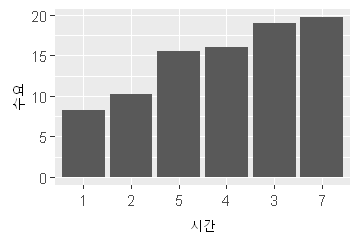

In [45]:
print(g)

이번에는 gcookbook 패키지의 cabbage_exp 데이터를 가져와보자.

In [46]:
data(cabbage_exp,package='gcookbook')

원래 MASS라는 패키지에 포함된 데이터를 Chang이 손본 것이다. 양배추 성장 데이터다.

In [47]:
str(cabbage_exp)

'data.frame':	6 obs. of  6 variables:
 $ Cultivar: Factor w/ 2 levels "c39","c52": 1 1 1 2 2 2
 $ Date    : Factor w/ 3 levels "d16","d20","d21": 1 2 3 1 2 3
 $ Weight  : num  3.18 2.8 2.74 2.26 3.11 1.47
 $ sd      : num  0.957 0.279 0.983 0.445 0.791 ...
 $ n       : int  10 10 10 10 10 10
 $ se      : num  0.3025 0.0882 0.311 0.1408 0.2501 ...


Cultivar라는 factor에 대해(c39와 c52) 각각 그래프를 그려서 포개어(dodge) 놓고 싶다. `geom_col(position='dodge')`를 사용하면 된다. 이때 각각의 그래프를 그려서 구분하는 방법을 채움(fill)으로 했다. aes()안에 fill=Cultivar를 추가한다.

In [48]:
g <- ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))
g <- g+geom_col(position='dodge')

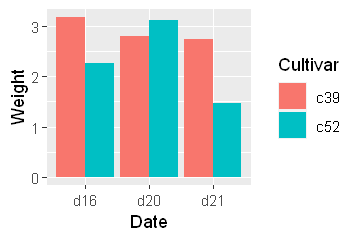

In [49]:
print(g)

음수와 양수에 따라 각기 다른 색을 넣는 방법도 있다. 예를 위해 climate 데이터를 가져오자.

In [50]:
data(climate,package='gcookbook')

In [51]:
str(climate)

'data.frame':	499 obs. of  6 variables:
 $ Source    : chr  "Berkeley" "Berkeley" "Berkeley" "Berkeley" ...
 $ Year      : num  1800 1801 1802 1803 1804 ...
 $ Anomaly1y : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Anomaly5y : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Anomaly10y: num  -0.435 -0.453 -0.46 -0.493 -0.536 -0.541 -0.59 -0.695 -0.763 -0.818 ...
 $ Unc10y    : num  0.505 0.493 0.486 0.489 0.483 0.475 0.468 0.461 0.453 0.451 ...


비즈니스 데이터 분석 시간에는 tidyverse를 이용해서 다양한 data wrangling 방법을 익히게 된다. 아래는 Berkeley 소스에서 1900년 이상의 날짜를 걸러내고, Anomaly10y가 양수일 경우 positive에 TRUE, 그렇지 않으면 FALSE라고 하는 컬럼을 추가하여 climate_new라는 데이터로 만드는 모습을 보여준다.

In [54]:
climate_new <- climate%>%
    filter(Source%in%c('Berkeley'))%>%
    filter(Year>=1900)%>%
    mutate(positive=Anomaly10y>=0)

분포를 일단 `table()`로 살펴보자.

In [55]:
table(climate_new$positive)


FALSE  TRUE 
   47    58 

그래프를 그리는 방법은 다르지 않다. 역시 fill로 구분하자. 그런데 정확한 대응 위치를 잡기 위해(위 아래가 왔다갔다 하니까) geom_col(position='identity')라고 하자.

In [56]:
g <- ggplot(climate_new,aes(x=factor(Year),y=Anomaly10y,fill=positive))
g <- g+geom_col(position='identity')

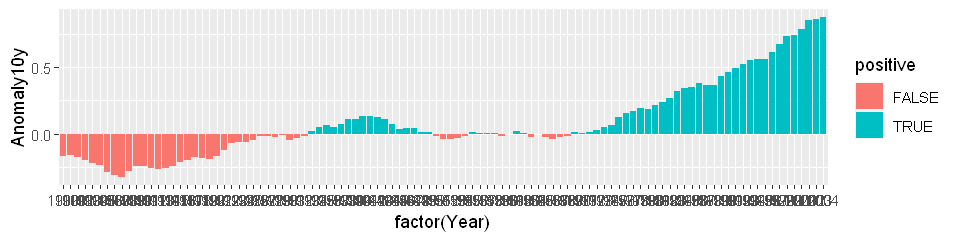

In [59]:
options(repr.plot.width=8)
print(g)

모양에 손을 좀 보면 훨씬 좋다. 외곽색을 검정으로 하고 색을 칠하는 펜의 크기를 0.25로 둔다.

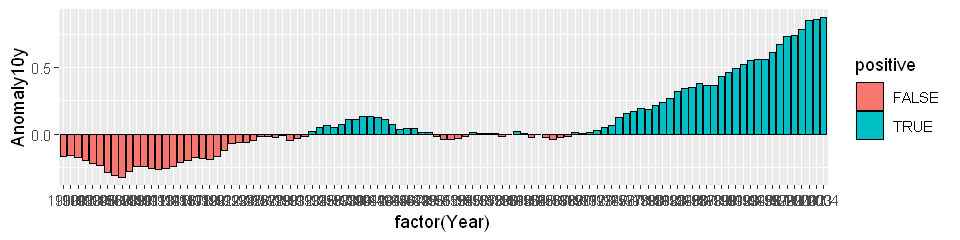

In [61]:
g <- ggplot(climate_new,aes(x=factor(Year),y=Anomaly10y,fill=positive))
g <- g+geom_col(position='identity',color='black',size=0.25)
print(g)

R에서 사용할 수 있는 색상 조견표는 `color()`에 있다. 여기서 red라고 되어 있는 색상과 blue로 되어 있는 색상을 찾아서 원하는 것을 써보자.

In [73]:
colors()[colors()%>%str_detect('red')]

[1] "darkred"         "indianred"       "indianred1"      "indianred2"     
 [5] "indianred3"      "indianred4"      "mediumvioletred" "orangered"      
 [9] "orangered1"      "orangered2"      "orangered3"      "orangered4"     
[13] "palevioletred"   "palevioletred1"  "palevioletred2"  "palevioletred3" 
[17] "palevioletred4"  "red"             "red1"            "red2"           
[21] "red3"            "red4"            "violetred"       "violetred1"     
[25] "violetred2"      "violetred3"      "violetred4"

In [74]:
colors()[colors()%>%str_detect('blue')]

[1] "aliceblue"       "blue"            "blue1"           "blue2"          
 [5] "blue3"           "blue4"           "blueviolet"      "cadetblue"      
 [9] "cadetblue1"      "cadetblue2"      "cadetblue3"      "cadetblue4"     
[13] "cornflowerblue"  "darkblue"        "darkslateblue"   "deepskyblue"    
[17] "deepskyblue1"    "deepskyblue2"    "deepskyblue3"    "deepskyblue4"   
[21] "dodgerblue"      "dodgerblue1"     "dodgerblue2"     "dodgerblue3"    
[25] "dodgerblue4"     "lightblue"       "lightblue1"      "lightblue2"     
[29] "lightblue3"      "lightblue4"      "lightskyblue"    "lightskyblue1"  
[33] "lightskyblue2"   "lightskyblue3"   "lightskyblue4"   "lightslateblue" 
[37] "lightsteelblue"  "lightsteelblue1" "lightsteelblue2" "lightsteelblue3"
[41] "lightsteelblue4" "mediumblue"      "mediumslateblue" "midnightblue"   
[45] "navyblue"        "powderblue"      "royalblue"       "royalblue1"     
[49] "royalblue2"      "royalblue3"      "royalblue4"      "skyblue"        
[53] "skyblue1"        "skyblue2"        "skyblue3"        "skyblue4"       
[57] "slateblue"       "slateblue1"      "slateblue2"      "slateblue3"     
[61] "slateblue4"      "steelblue"       "steelblue1"      "steelblue2"     
[65] "steelblue3"      "steelblue4"

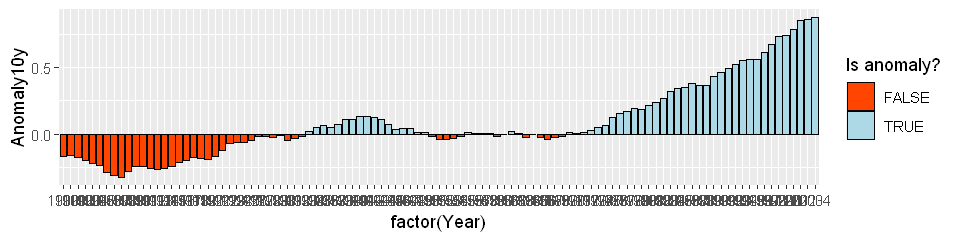

In [76]:
g <- ggplot(climate_new,aes(x=factor(Year),y=Anomaly10y,fill=positive))
g <- g+geom_col(position='identity',color='black',size=0.25)
g <- g+scale_fill_manual(values=c('orangered','lightblue'))
g <- g+labs(fill='Is anomaly?')
print(g)

geom_col()에 라벨을 붙이려면 `geom_text()`를 사용한다. 이 함수의 aes()안에 label= 이라고 해서 붙일 값을 지정하면 된다. 흔히 y값으로 지정한 데이터가 label=에 붙는다. 라벨 텍스트의 색상도 color로 정해주자.

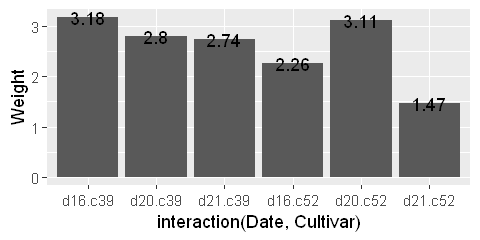

In [81]:
options(repr.plot.width=4)
g <- ggplot(cabbage_exp,aes(x=interaction(Date,Cultivar),y=Weight))
g <- g+geom_col()
g <- g+geom_text(aes(label=Weight),color='black')
print(g)

라벨의 수직 위치를 조절하려면 vjust를 쓰면 된다. 아래 예를 통해 그 차이를 보자.

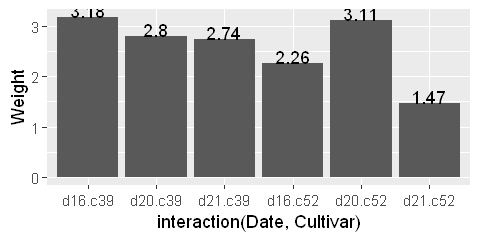

In [82]:
options(repr.plot.width=4)
g <- ggplot(cabbage_exp,aes(x=interaction(Date,Cultivar),y=Weight))
g <- g+geom_col()
g <- g+geom_text(aes(label=Weight),vjust=0,color='black')
print(g)

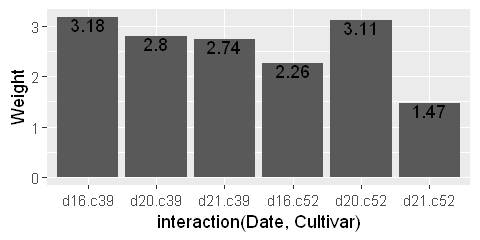

In [83]:
options(repr.plot.width=4)
g <- ggplot(cabbage_exp,aes(x=interaction(Date,Cultivar),y=Weight))
g <- g+geom_col()
g <- g+geom_text(aes(label=Weight),vjust=1,color='black')
print(g)

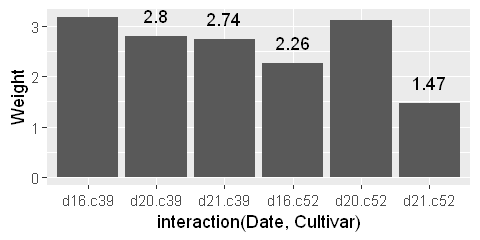

In [84]:
options(repr.plot.width=4)
g <- ggplot(cabbage_exp,aes(x=interaction(Date,Cultivar),y=Weight))
g <- g+geom_col()
g <- g+geom_text(aes(label=Weight),vjust=-1,color='black')
print(g)

일부 라벨이 보이지 않는다. 이를 수정하려면 그래프의 y 영역을 키우면 된다. `scale_y_continuous(limits=c(,))`를 걸어서 해결하자.

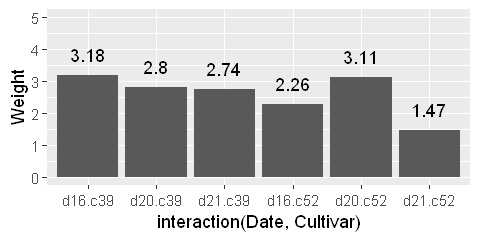

In [87]:
options(repr.plot.width=4)
g <- ggplot(cabbage_exp,aes(x=interaction(Date,Cultivar),y=Weight))
g <- g+scale_y_continuous(limits = c(0,5))
g <- g+geom_col()
g <- g+geom_text(aes(label=Weight),vjust=-1,color='black')
print(g)